# Toy data benchmark: comparison optimal cost vs mSTreg heuristic cost

In [1]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


In [2]:
import os
import sys
if 'benchmark_smalltoydata' in os.getcwd():
	os.chdir('../../..')
	sys.path.insert(0,os.getcwd())
print(os.getcwd())
print(sys.path[0])

/tmp/WiSHxRYJge
/media/hdb/enfita/pycharm-professional-2021.3.3/plugins/python/helpers-pro/jupyter_debug


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.lines import Line2D

In [10]:
folder_ratios = 'Experiments/Benchmark_mSTreg/benchmark_smalltoydata/ratios/'
folder_quantiles = 'Experiments/Benchmark_mSTreg/benchmark_smalltoydata/quantiles/'
def num_branched_topos(num_terminals):
    num_topos = 1
    for i in range(2 * num_terminals):
        k = 2 * num_terminals - 5 - 2 * i
        if k > 1:
            num_topos *= k
        else:
            break
    return num_topos

### PLOT COMPARING COST RATIOS AND RANK POSITIONS FOR DIFFERENT ALPHA VALUES AT DIFFERENT NUMBER OF TERMINALS


In [11]:
#if True, save plots
save=False

n_range=range(5,10)
if save:
    folder_results={}
    for n in n_range:
        folder_results[n]='Figures/Benchmark_smalldata_CST/n=%i/'%n
        os.makedirs(folder_results[n],True)

alpha_range=np.array(list(range(11)))/10


In [12]:

# dictionaries with ratios with respect to optimum and quantile positions with respect to all trees of heuristic costs
quantiles_BCST_dict={}
quantiles_CST_dict={n:{} for n in n_range}
ratios_BCST_dict={}
ratios_CST_dict={n:{} for n in n_range}

# BP collapse strategy criteria
order_criterium_ls = ['closest']
merging_criterium_ls = ['closest']
criterium_BP_position_update_ls = ['median']

total_options = len(criterium_BP_position_update_ls) * len(merging_criterium_ls) * len(order_criterium_ls)
ls_criteriums = list(itertools.product(order_criterium_ls, criterium_BP_position_update_ls, merging_criterium_ls))

#load ratios and quantiles
for n in n_range:
    ratios_BCST_dict[n]=np.load(folder_ratios+'ratios_BCST_n=%i.npy'%n)
    quantiles_BCST_dict[n]=np.load(folder_quantiles+'quantiles_BCST_n=%i.npy'%n)
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
        ratios_CST_dict[n][txt_CST]=np.load(folder_ratios + 'ratios_CST_%s_n=%i.npy' % (txt_CST, n))

        quantiles_CST_dict[n][txt_CST]=np.load(folder_quantiles + 'quantiles_CST_%s_n=%i.npy' % (txt_CST, n))


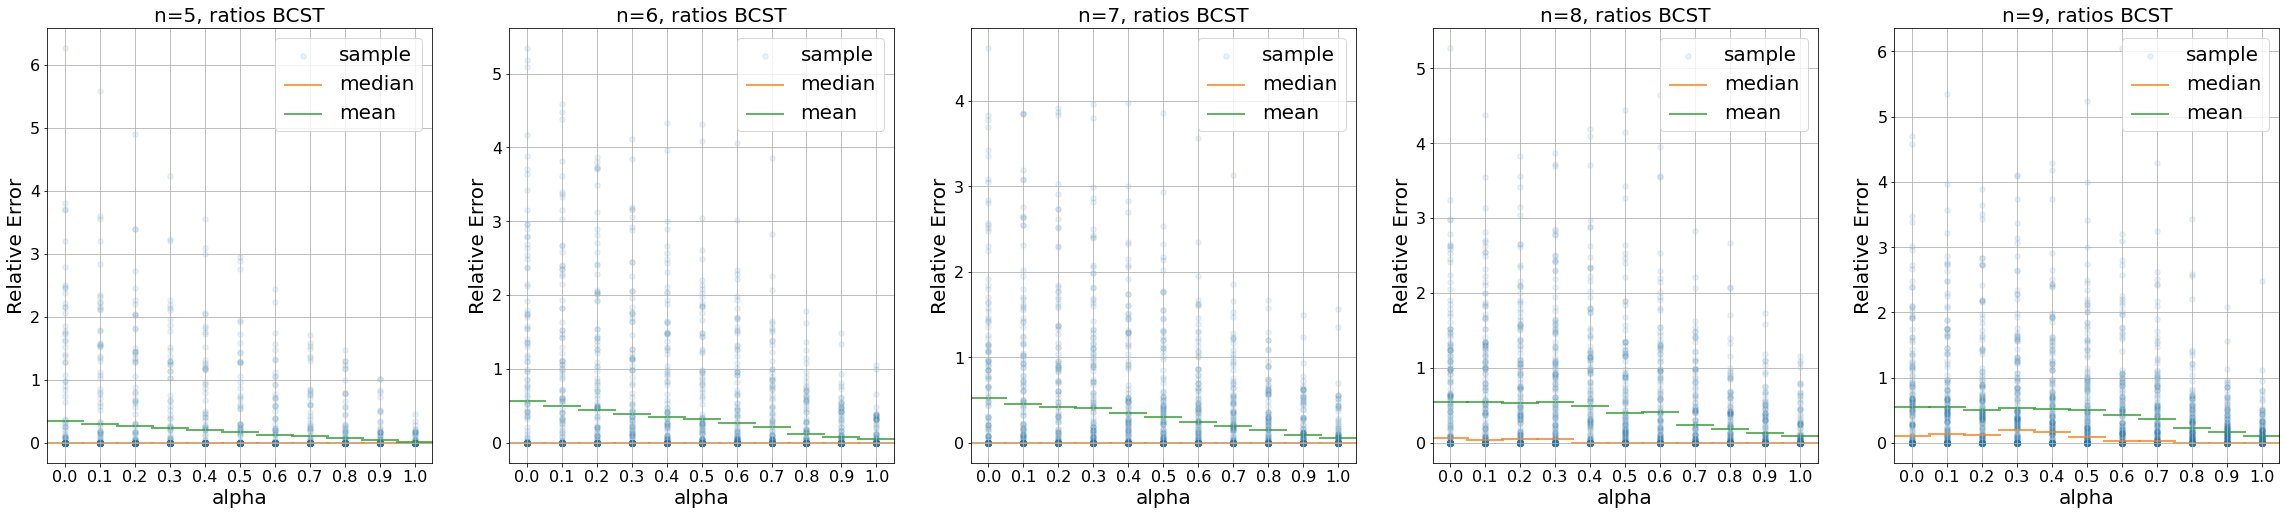

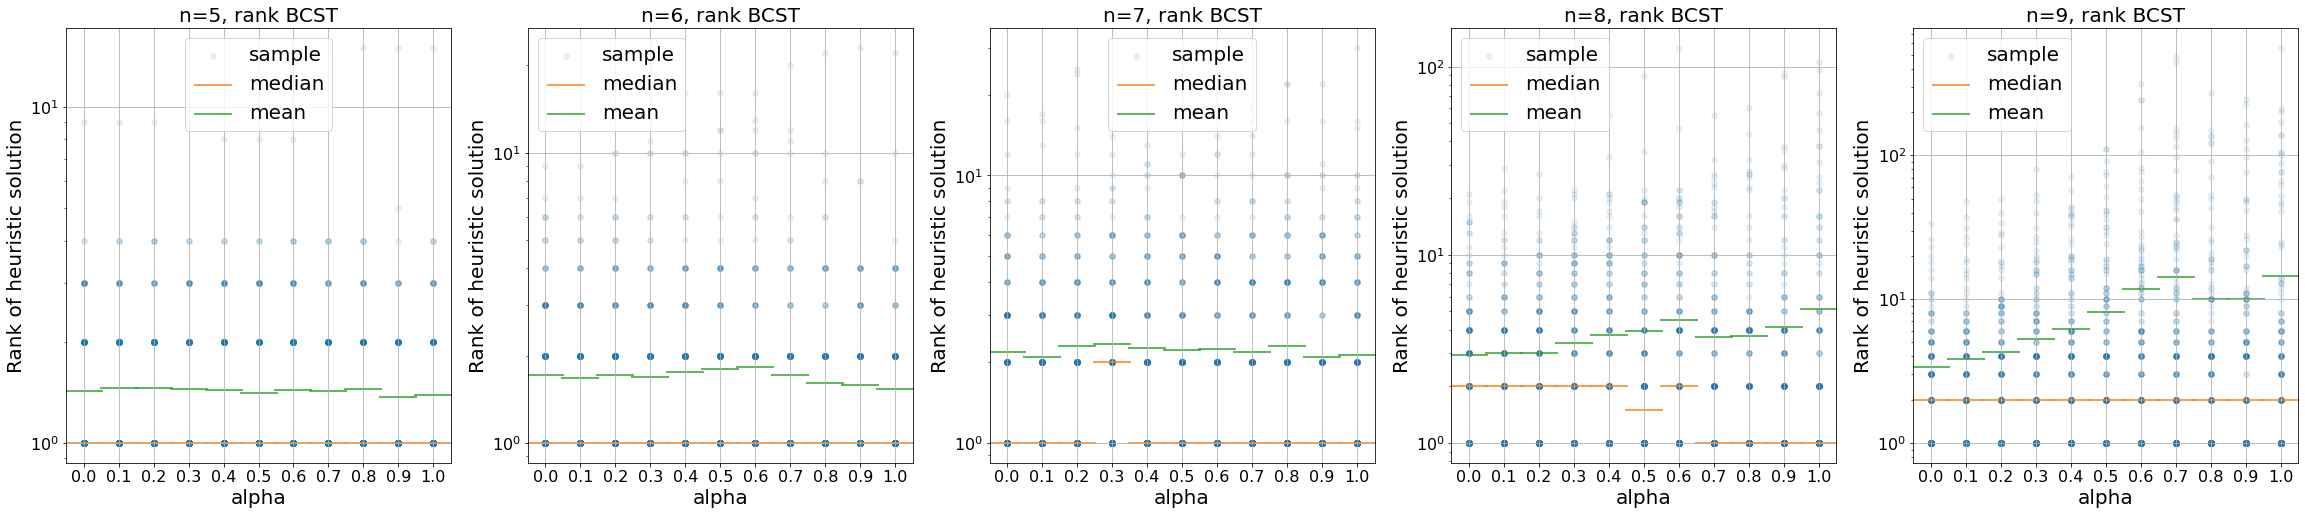

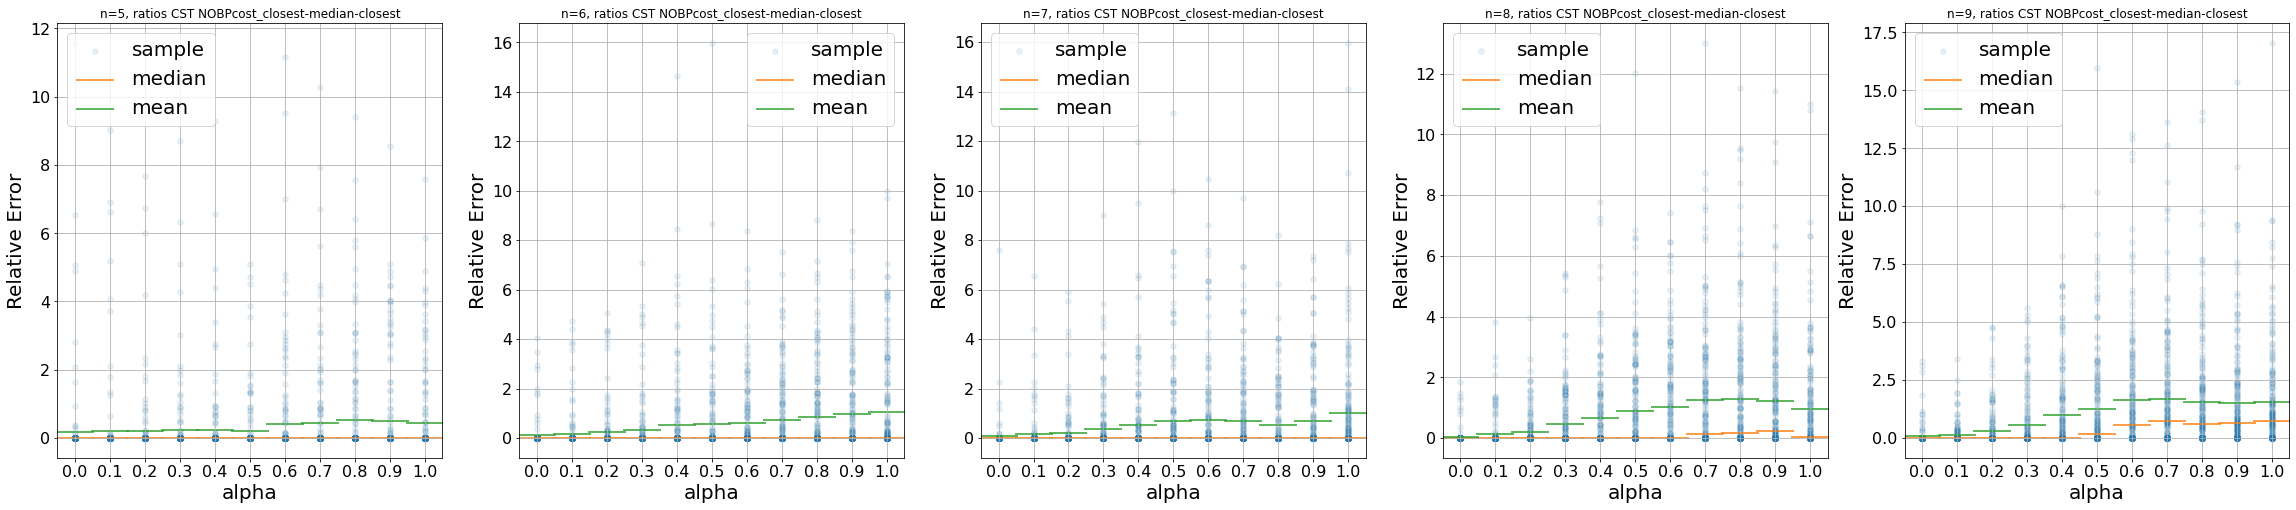

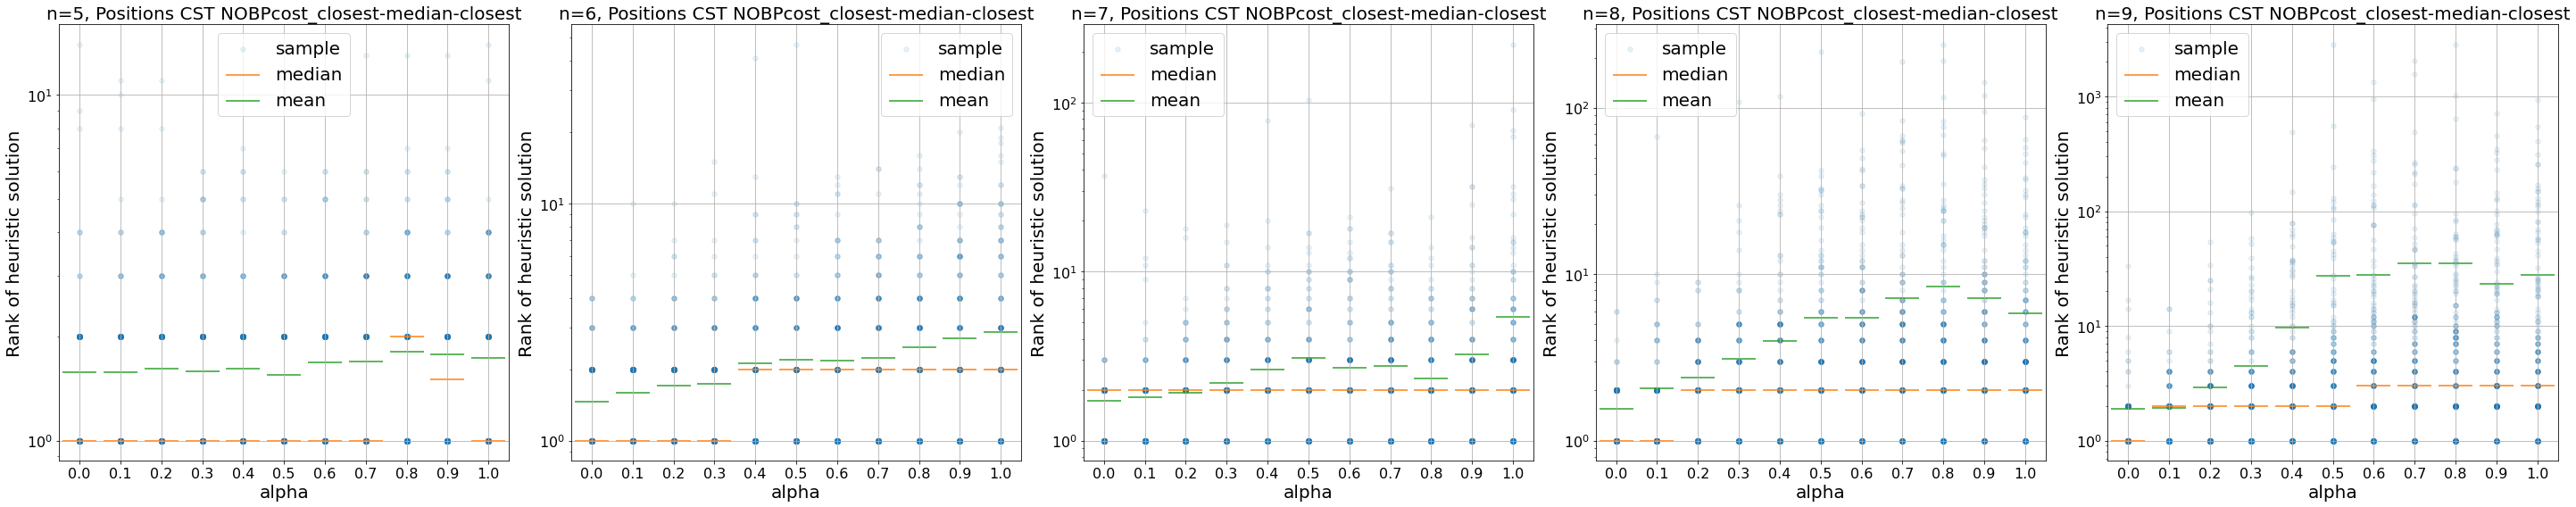

In [13]:
# Create a single figure with len(n_range) subplots in a single row if save == False
if not save:
    fig_ratios_BCST, axs_ratios_BCST = plt.subplots(1, len(n_range), figsize=(len(n_range) * 8, 8))
    fig_ranks_BCST, axs_ranks_BCST = plt.subplots(1, len(n_range), figsize=(len(n_range) * 8, 8))
    fig_ratios_CST, axs_ratios_CST = plt.subplots(1, len(n_range), figsize=(len(n_range) * 8, 8))
    fig_ranks_CST, axs_ranks_CST = plt.subplots(1, len(n_range), figsize=(len(n_range) * 8, 8))

# Iterate through n_range and create plots
for i, n in enumerate(n_range):
    if save:
        fig_ratios_BCST, axs_ratios_BCST = plt.subplots(1, 1, figsize=(8, 8))
        axs_ratios_BCST=[axs_ratios_BCST]
        fig_ranks_BCST, axs_ranks_BCST = plt.subplots(1, 1, figsize=( 8, 8))
        axs_ranks_BCST=[axs_ranks_BCST]

        fig_ratios_CST, axs_ratios_CST = plt.subplots(1, 1, figsize=(8, 8))
        axs_ratios_CST=[axs_ratios_CST]
        fig_ranks_CST, axs_ranks_CST = plt.subplots(1, 1, figsize=( 8, 8))
        axs_ranks_CST=[axs_ranks_CST]
        i=0

    num_topos = num_branched_topos(num_terminals=n)
    ratios_BCST=ratios_BCST_dict[n]
    quantiles_BCST=quantiles_BCST_dict[n]
    shift = 1
    s = 30
    scale_line = 50
    fontsize_label = 20
    fontsize_ticks = 16

    # Plot the data on the respective subplot
    assert(shift==1)
    axs_ratios_BCST[i].scatter(ratios_BCST[:,0], 100 * (ratios_BCST[:,1] - shift), alpha=0.1, s=s, label='sample')
    median_BCST = [100*np.median((ratios_BCST[np.where(ratios_BCST[:, 0] == alpha), 1])-shift) for alpha in alpha_range]
    mean_BCST = [100*np.mean((ratios_BCST[np.where(ratios_BCST[:, 0] == alpha), 1])-shift) for alpha in alpha_range]
    axs_ratios_BCST[i].scatter(alpha_range, median_BCST, marker='_', label='median', s=scale_line * s)
    axs_ratios_BCST[i].scatter(alpha_range, mean_BCST, marker='_', label='mean', s=scale_line * s)
    axs_ratios_BCST[i].set_xlabel('alpha', fontsize=fontsize_label)
    axs_ratios_BCST[i].set_ylabel('Relative Error', fontsize=fontsize_label)

    axs_ratios_BCST[i].set_xticks(alpha_range)
    axs_ratios_BCST[i].tick_params(axis='x', labelsize=fontsize_ticks)
    axs_ratios_BCST[i].tick_params(axis='y', labelsize=fontsize_ticks)
    axs_ratios_BCST[i].set_xlim(-0.05, 1.05)
    axs_ratios_BCST[i].legend(fontsize=fontsize_label)
    axs_ratios_BCST[i].grid()
    plt.tight_layout()

    # Display or save the plot based on the 'save' flag
    if save:
        # Save the current plot individually
        plt.savefig(folder_results[n]+'ratios_BCST_n=%i' % n)
        plt.close() # Close the current plot to create a new one for the next iteration
    else:
        axs_ratios_BCST[i].set_title('n=%i, ratios BCST' % n, fontsize=fontsize_label)



    #PLOT RANK POSITIONS
    positions_BCST=quantiles_BCST.copy()
    positions_BCST[:,1] = 1 + quantiles_BCST[:,1] * num_topos / 100

    axs_ranks_BCST[i].scatter(positions_BCST[:, 0], positions_BCST[:, 1], alpha=0.1, s=s, label='sample')
    median_ranks_BCST = [np.median(positions_BCST[np.where(positions_BCST[:, 0] == alpha), 1]) for alpha in alpha_range]
    mean_ranks_BCST = [np.mean(positions_BCST[np.where(positions_BCST[:, 0] == alpha), 1]) for alpha in alpha_range]
    axs_ranks_BCST[i].scatter(alpha_range, median_ranks_BCST, marker='_', label='median', s=scale_line * s)
    axs_ranks_BCST[i].scatter(alpha_range, mean_ranks_BCST, marker='_', label='mean', s=scale_line * s)
    axs_ranks_BCST[i].set_xlabel('alpha', fontsize=fontsize_label)
    axs_ranks_BCST[i].set_ylabel('Rank of heuristic solution', fontsize=fontsize_label)
    axs_ranks_BCST[i].set_xticks(alpha_range)
    axs_ranks_BCST[i].tick_params(axis='x', labelsize=fontsize_ticks)
    axs_ranks_BCST[i].tick_params(axis='y', labelsize=fontsize_ticks)
    axs_ranks_BCST[i].set_xlim(-0.05, 1.05)
    axs_ranks_BCST[i].legend(fontsize=fontsize_label)
    axs_ranks_BCST[i].grid()
    axs_ranks_BCST[i].set_yscale('log')
    if save:
        plt.tight_layout()
        plt.savefig(folder_results[n]+'rank_BCST_n=%i'%n)
        plt.close()
    else:
        axs_ranks_BCST[i].set_title('n=%i, rank BCST' % n, fontsize=fontsize_label)
        plt.tight_layout()

    # CST PLOTS
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
        ratios_CST=ratios_CST_dict[n][txt_CST]
        quantiles_CST=quantiles_CST_dict[n][txt_CST]
        positions_CST = quantiles_CST.copy()
        positions_CST[:, 1] =  1 + quantiles_CST[:, 1] * (n ** (n - 2)) / 100

        # PLOT RATIOS
        axs_ratios_CST[i].scatter(ratios_CST[:,0], 100 * (ratios_CST[:,1] - shift), alpha=0.1, s=s, label='sample')
        median_CST = [100*np.median((ratios_CST[np.where(ratios_CST[:, 0] == alpha), 1])-shift) for alpha in alpha_range]
        mean_CST = [100*np.mean((ratios_CST[np.where(ratios_CST[:, 0] == alpha), 1])-shift) for alpha in alpha_range]
        axs_ratios_CST[i].scatter(alpha_range, median_CST, marker='_', label='median', s=scale_line * s)
        axs_ratios_CST[i].scatter(alpha_range, mean_CST, marker='_', label='mean', s=scale_line * s)
        axs_ratios_CST[i].set_xlabel('alpha', fontsize=fontsize_label)
        axs_ratios_CST[i].set_ylabel('Relative Error', fontsize=fontsize_label)

        axs_ratios_CST[i].set_xticks(alpha_range)
        axs_ratios_CST[i].tick_params(axis='x', labelsize=fontsize_ticks)
        axs_ratios_CST[i].tick_params(axis='y', labelsize=fontsize_ticks)
        axs_ratios_CST[i].set_xlim(-0.05, 1.05)
        axs_ratios_CST[i].legend(fontsize=fontsize_label)
        axs_ratios_CST[i].grid()
        plt.tight_layout()

        # Display or save the plot based on the 'save' flag
        if save:
            # Save the current plot individually
            plt.savefig(folder_results[n] + 'ratios_CST_n=%i%s' % (n, txt_CST))
            plt.close() # Close the current plot to create a new one for the next iteration
        else:
            axs_ratios_CST[i].set_title('n=%i, ratios CST %s' % (n, txt_CST))





        # PLOT RANK POSITIONS
        axs_ranks_CST[i].scatter(positions_CST[:, 0], positions_CST[:, 1], alpha=0.1, s=s, label='sample')
        median_ranks_CST = [np.median(positions_CST[np.where(positions_CST[:, 0] == alpha), 1]) for alpha in alpha_range]
        mean_ranks_CST = [np.mean(positions_CST[np.where(positions_CST[:, 0] == alpha), 1]) for alpha in alpha_range]
        axs_ranks_CST[i].scatter(alpha_range, median_ranks_CST, marker='_', label='median', s=scale_line * s)
        axs_ranks_CST[i].scatter(alpha_range, mean_ranks_CST, marker='_', label='mean', s=scale_line * s)
        axs_ranks_CST[i].set_xlabel('alpha', fontsize=fontsize_label)
        axs_ranks_CST[i].set_ylabel('Rank of heuristic solution', fontsize=fontsize_label)
        axs_ranks_CST[i].set_xticks(alpha_range)
        axs_ranks_CST[i].tick_params(axis='x', labelsize=fontsize_ticks)
        axs_ranks_CST[i].tick_params(axis='y', labelsize=fontsize_ticks)
        axs_ranks_CST[i].set_xlim(-0.05, 1.05)
        axs_ranks_CST[i].legend(fontsize=fontsize_label)
        axs_ranks_CST[i].grid()
        axs_ranks_CST[i].set_yscale('log')
        if save:
            plt.tight_layout()
            plt.savefig(folder_results[n] + 'positions_CST_n=%i%s.png' % (n, txt_CST), fontsize=fontsize_label)
            plt.close()
        else:
            axs_ranks_CST[i].set_title('n=%i, Positions CST %s' % (n, txt_CST), fontsize=fontsize_label)
            plt.tight_layout()


# Show the combined plot if save is False
if not save:
    plt.show()

### COMPARISON RANK POSITION FOR DIFFERENT COLLAPSE STRATEGIES AT DIFFERENT NUMBER OF TERMINALS AND ALPHA VALUES


In [25]:
# if save True, save all plots
save=False

plot_mean=True
plot_median=False

n_range=range(5,10)
if save:
    folder_results={}
    for n in n_range:
        folder_results[n]='Figures/Benchmark_smalldata_CST/n=%i/'%n
        os.makedirs(folder_results[n],True)

alpha_range=np.array(list(range(11)))/10

# dictionaries with ratios with respect to optimum and quantile positions with respect to all trees of heuristic costs
quantiles_CST_dict={n:{} for n in n_range}
ratios_CST_dict={n:{} for n in n_range}

# BP collapse strategy criteria
order_criterium_ls = ['closest','closestterminals']
merging_criterium_ls = ['tryall', 'closest']
criterium_BP_position_update_ls = ['median','no_update']


total_options = len(criterium_BP_position_update_ls) * len(merging_criterium_ls) * len(order_criterium_ls)
ls_criteriums = list(itertools.product(order_criterium_ls, criterium_BP_position_update_ls, merging_criterium_ls))

#load quantiles and ratios
for n in n_range:
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
        ratios_CST_dict[n][txt_CST]=np.load(folder_ratios + 'ratios_CST_%s_n=%i.npy' % (txt_CST, n))

        quantiles_CST_dict[n][txt_CST]=np.load(folder_quantiles + 'quantiles_CST_%s_n=%i.npy' % (txt_CST, n))



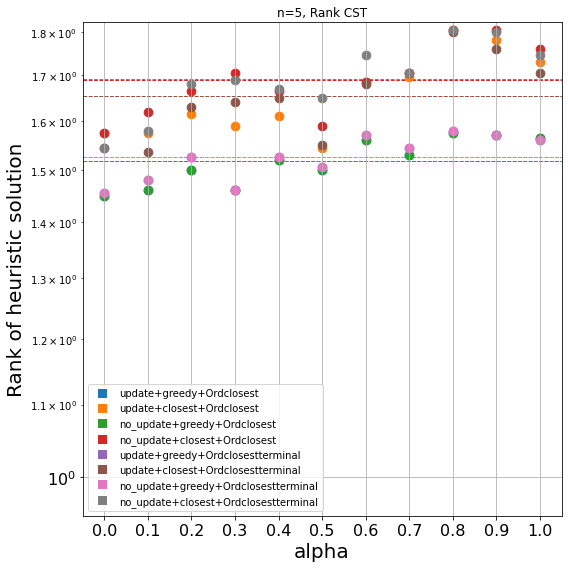

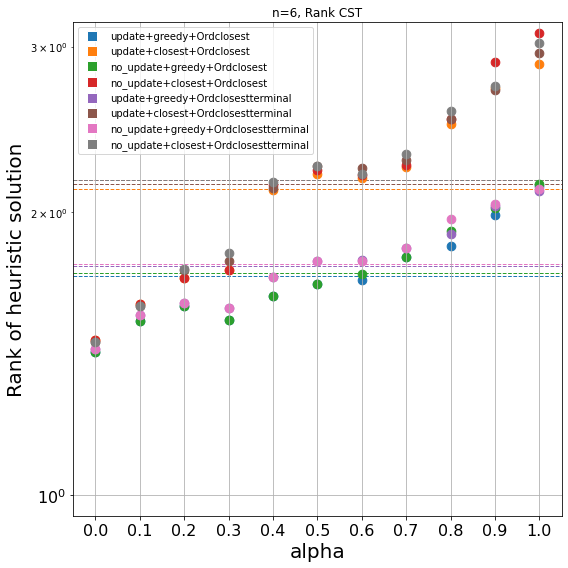

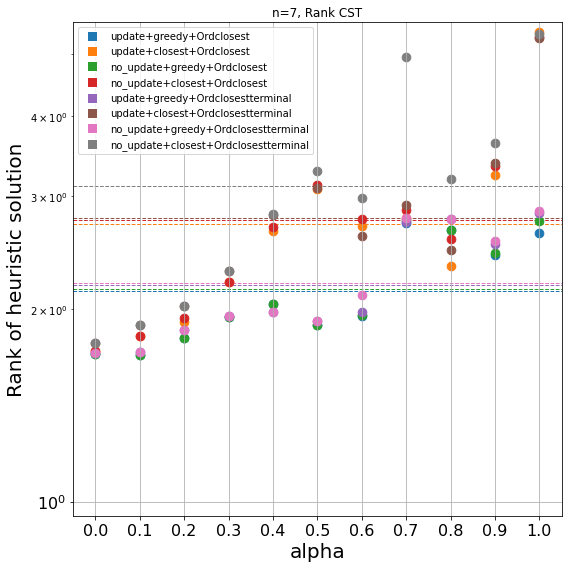

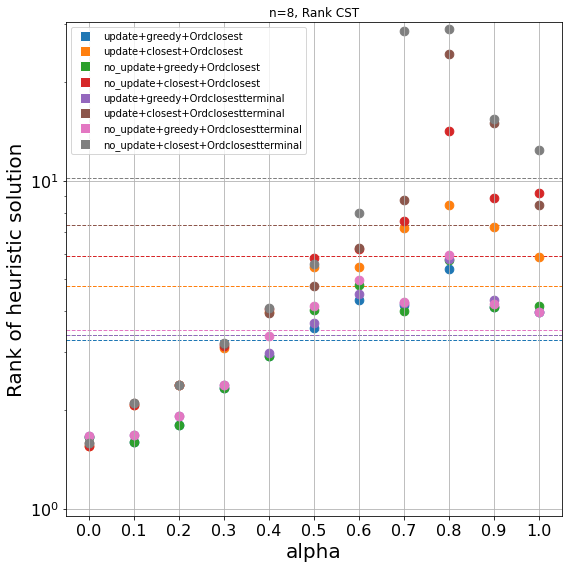

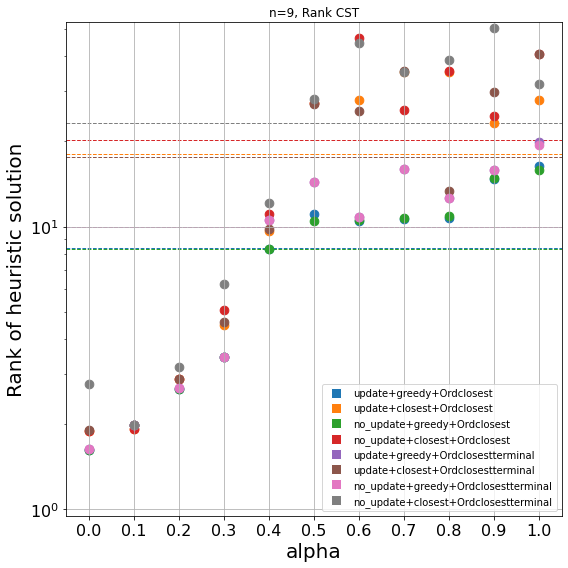

In [26]:
# Define colors for plotting
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
        'tab:gray','tab:cyan','tab:olive']

# Define markers for mean and median
mean_marker='o'
median_marker='*'

# Iterate through the values in n_range
for n in n_range:
    # Define plot parameters
    s = 15  # Marker size
    scale_line = 5  # Scale factor for marker size
    legend_size = 10  # Font size for legend
    figsize = (8, 8)  # Figure size
    fontsize_label = 20  # Font size for axis labels
    fontsize_ticks = 16  # Font size for axis ticks

    # Define legend elements for mean and median if required
    legend_elements = []
    if plot_mean and plot_median:
        legend_elements.append(Line2D([0], [0], marker=mean_marker, color='w', markerfacecolor='k', label='mean',
                                       markersize=legend_size))
        legend_elements.append(Line2D([0], [0], marker=median_marker, color='w', markerfacecolor='k', label='median',
                                       markersize=legend_size))
    else:
        legend_elements = []

    # Define color index for iterating through colors list
    color_idx = -1

    # Create a new figure
    plt.figure(figsize=figsize)

    # Iterate through different criteria for the current n value
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        color_idx += 1  # Increment color index
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))

        # Get data for the current criterion
        ratios_CST = ratios_CST_dict[n][txt_CST]
        quantiles_CST = quantiles_CST_dict[n][txt_CST]
        positions_CST = quantiles_CST.copy()
        positions_CST[:, 1] = 1 + quantiles_CST[:, 1] * (n ** (n - 2)) / 100

        # Create a label for the legend
        label_method = ""
        if criterium_BP_position_update == 'median':
            label_method = 'update+'
        elif criterium_BP_position_update == 'no_update':
            label_method = 'no_update+'
        else:
            raise ValueError

        if merging_criterium == 'closest':
            label_method += 'closest'
        elif merging_criterium == 'tryall':
            label_method += 'greedy'
        else:
            raise ValueError

        if len(order_criterium_ls) > 1:
            if order_criterium == 'closestterminals':
                label_method += '+Ordclosestterminal'
            elif order_criterium == 'closest':
                label_method += '+Ordclosest'
            else:
                raise ValueError

        # Add current criterion to legend elements
        legend_elements.append(Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[color_idx],
                                      label=label_method, markersize=legend_size))

        # Compute mean and median of rank positions
        median_CST = [np.median(positions_CST[np.where(positions_CST[:, 0] == alpha), 1]) for alpha in alpha_range]
        mean_CST = [np.mean(positions_CST[np.where(positions_CST[:, 0] == alpha), 1]) for alpha in alpha_range]

        # Plot mean and median
        if plot_median:
            plt.scatter(alpha_range, median_CST, marker=median_marker, s=scale_line * s, c=colors[color_idx], alpha=1)
            plt.axhline(y=np.mean(median_CST), c=colors[color_idx], linewidth=1, alpha=1, linestyle='-.', zorder=0)
        if plot_mean:
            plt.scatter(alpha_range, mean_CST, marker=mean_marker, s=scale_line * s, c=colors[color_idx], alpha=1)
            plt.axhline(y=np.mean(mean_CST), c=colors[color_idx], linewidth=1, alpha=1, linestyle='--', zorder=0)

    # Set plot properties
    plt.xlabel('alpha', fontsize=fontsize_label)
    plt.ylabel('Rank of heuristic solution', fontsize=fontsize_label)
    plt.xticks(alpha_range, fontsize=fontsize_ticks)
    plt.ylim(0.95)  # Set y-axis limits
    plt.yticks(fontsize=fontsize_ticks)
    plt.xlim(-0.05, 1.05)  # Set x-axis limits
    plt.legend(handles=legend_elements, fontsize=legend_size)  # Add legend
    plt.yscale('log')  # Set y-axis scale to logarithmic
    plt.grid()  # Show gridlines

    # Save or display the plot based on the 'save' flag
    if save:
        plt.tight_layout()
        if plot_mean and plot_median:
            extra_ = ''
        elif plot_median:
            extra_ = 'only_median'
        elif plot_mean:
            extra_ = 'only_mean'
        else:
            raise ValueError
        plt.savefig(folder_results[n] + 'COMPARISON_positions_CST_%s_n=%i.png' % (extra_, n), dpi=150)
        plt.close()
    else:
        plt.title('n=%i, Rank CST' % (n))
        plt.tight_layout()
        plt.show()


### PLOT COMPARING COST RATIOS AND RANK POSITIONS FOR DIFFERENT NUMBER OF TERMINALS

In [16]:
# if save True, save all plots
save=False

plot_mean=True
plot_median=False

n_range=range(5,10)
if save:
    folder_results={}
    for n in n_range:
        folder_results[n]='Figures/Benchmark_smalldata_CST/n=%i/'%n
        os.makedirs(folder_results[n],True)

alpha_range=np.array(list(range(11)))/10

# dictionaries with ratios with respect to optimum and quantile positions with respect to all trees of heuristic costs
quantiles_CST_dict={n:{} for n in n_range}
ratios_CST_dict={n:{} for n in n_range}

# BP collapse strategy criteria
order_criterium_ls = ['closest','closestterminals']
merging_criterium_ls = ['tryall', 'closest']
criterium_BP_position_update_ls = ['median','no_update']


total_options = len(criterium_BP_position_update_ls) * len(merging_criterium_ls) * len(order_criterium_ls)
ls_criteriums = list(itertools.product(order_criterium_ls, criterium_BP_position_update_ls, merging_criterium_ls))

#load quantiles and ratios
for n in n_range:
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
        ratios_CST_dict[n][txt_CST]=np.load(folder_ratios + 'ratios_CST_%s_n=%i.npy' % (txt_CST, n))

        quantiles_CST_dict[n][txt_CST]=np.load(folder_quantiles + 'quantiles_CST_%s_n=%i.npy' % (txt_CST, n))



In [17]:
# if save True, save all plots
save=False

# If save is True, specify the folder to save the plots
if save:
    folder_results='Figures/Benchmark_smalldata_CST/'
    os.makedirs(folder_results,True)


n_range=range(5,10)

# dictionaries with ratios with respect to optimum and quantile positions with respect to all trees of heuristic costs
quantiles_BCST_dict={}
quantiles_CST_dict={n:{} for n in n_range}
ratios_BCST_dict={}
ratios_CST_dict={n:{} for n in n_range}

# BP collapse strategy criteria
order_criterium_ls = ['closest']
merging_criterium_ls = ['closest']
criterium_BP_position_update_ls = ['median']

# Generate all possible combinations of criteria
total_options = len(criterium_BP_position_update_ls) * len(merging_criterium_ls) * len(order_criterium_ls)
ls_criteriums = list(itertools.product(order_criterium_ls, criterium_BP_position_update_ls, merging_criterium_ls))

# Load quantiles and ratios from saved files
for n in n_range:
    ratios_BCST_dict[n]=np.load(folder_ratios+'ratios_BCST_n=%i.npy'%n)
    quantiles_BCST_dict[n]=np.load(folder_quantiles+'quantiles_BCST_n=%i.npy'%n)
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
        ratios_CST_dict[n][txt_CST]=np.load(folder_ratios + 'ratios_CST_%s_n=%i.npy' % (txt_CST, n))

        quantiles_CST_dict[n][txt_CST]=np.load(folder_quantiles + 'quantiles_CST_%s_n=%i.npy' % (txt_CST, n))

ratios_BCST=[]
quantiles_BCST=[]
# Initialize lists for storing ratios and quantiles
for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
    txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
    ratios_CST_={txt_CST:[] for n in n_range}
    quantiles_CST_={txt_CST:[] for n in n_range}

# Fill dictionaries differentiating the number of terminals but not the alpha values
n_values_ls=[]
for n in n_range:
    ratios_BCST+=ratios_BCST_dict[n][:,1].tolist()
    quantiles_BCST += quantiles_BCST_dict[n][:, 1].tolist()


    n_values_ls+=len(quantiles_BCST_dict[n][:, 1])*[n]
    for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
        txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))

        quantiles_CST_[txt_CST]+= quantiles_CST_dict[n][txt_CST][:, 1].tolist()
        ratios_CST_[txt_CST] += ratios_CST_dict[n][txt_CST][:, 1].tolist()

# Convert lists to numpy arrays for further processing
n_values_ls=np.array(n_values_ls,dtype=int)
ratios_BCST = np.clip(ratios_BCST, 1.0, None)
quantiles_BCST=np.array(quantiles_BCST)

for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
    txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))

    quantiles_CST_[txt_CST] = np.array(quantiles_CST_[txt_CST])
    ratios_CST_[txt_CST] = np.array(ratios_CST_[txt_CST])

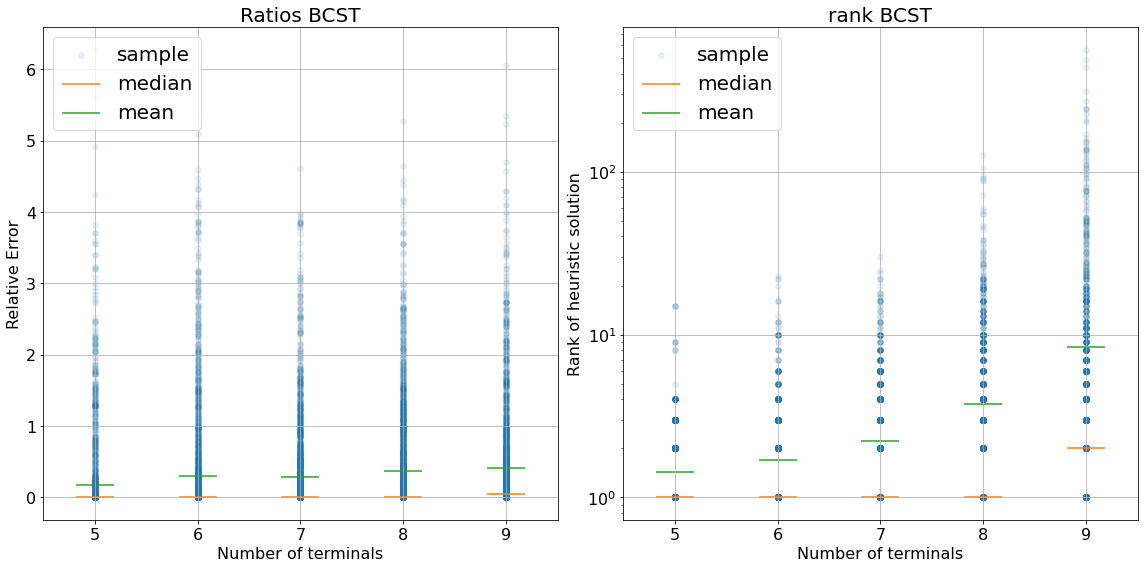

eo


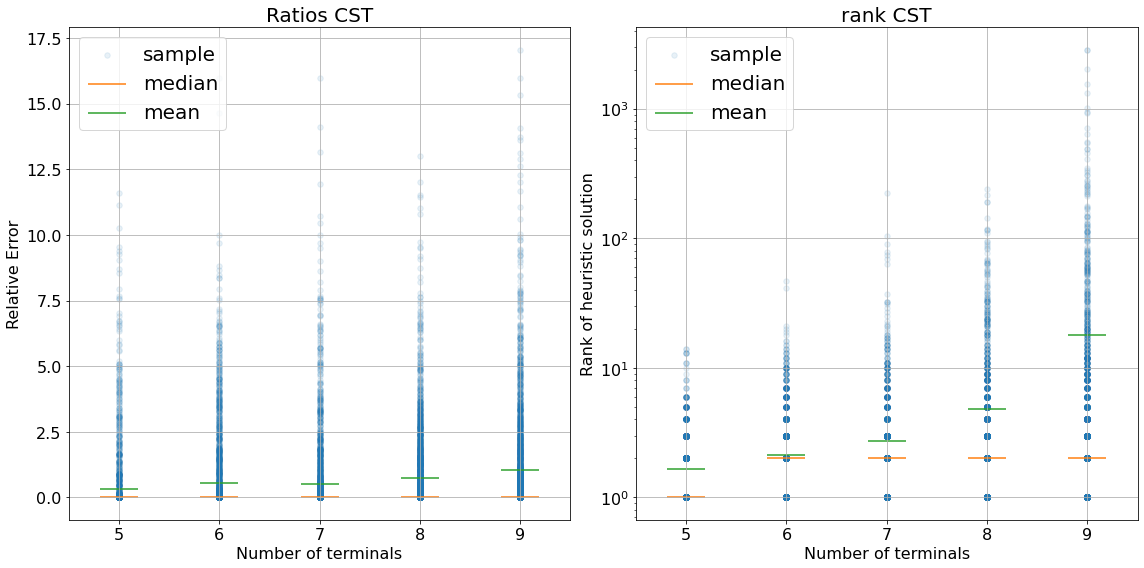

In [18]:
# PLOT RATIOS
s=30
scale_line=50
figsize=(8,8)
shift=1
fontsize_label=20
fontsize_ticks=16



if save:
    fig_BCST, axs_BCST = plt.subplots(1, 1, figsize=(8, 8))
    axs_BCST=[axs_BCST]
else:
    fig_BCST, axs_BCST = plt.subplots(1, 2, figsize=(2 * 8, 8))
i=0



#plot BCST ratios
assert(shift==1)
axs_BCST[i].scatter(n_values_ls,100*(ratios_BCST-shift),alpha=0.1,s=s, label='sample')
median_BCST=[100*(np.median(ratios_BCST[n_values_ls==n])-shift) for n in n_range]
mean_BCST=[100*(np.mean(ratios_BCST[n_values_ls==n])-shift) for n in n_range]
axs_BCST[i].scatter(n_range,median_BCST,marker='_', label='median',s=scale_line*s)
axs_BCST[i].scatter(n_range,mean_BCST,marker='_', label='mean',s=scale_line*s)
axs_BCST[i].set_xlabel('Number of terminals', fontsize=fontsize_ticks)
axs_BCST[i].set_ylabel('Relative Error', fontsize=fontsize_ticks)
axs_BCST[i].set_xticks(n_range)
axs_BCST[i].tick_params(axis='x', labelsize=fontsize_ticks)
axs_BCST[i].tick_params(axis='y', labelsize=fontsize_ticks)
axs_BCST[i].set_xlim(4.5,9.5)
axs_BCST[i].legend(fontsize=fontsize_label,loc='upper left')
axs_BCST[i].grid()
plt.tight_layout()

# Display or save the plot based on the 'save' flag
if save:
    # Save the current plot individually
    plt.savefig(folder_results+ 'ratios_BCST.png',dpi=150)
    plt.close() # Close the current plot to create a new one for the next iteration
else:
    axs_BCST[i].set_title('Ratios BCST', fontsize=fontsize_label)
    i+=1


#COMPUTE RANK POSITIONS
num_topos_n_values=np.array(n_values_ls)
num_topos_n_values=num_topos_n_values**(num_topos_n_values-2)
num_branched_topos_n_values=np.array([num_branched_topos(i) for i in n_values_ls])
positions_BCST=1+quantiles_BCST*num_branched_topos_n_values/100

# PLOT BCST RANK POSITIONS
axs_BCST[i].scatter(n_values_ls,positions_BCST,alpha=0.1,label='sample',s=s)
median_BCST=[np.median(positions_BCST[n_values_ls==n]) for n in n_range]
mean_BCST=[np.mean(positions_BCST[n_values_ls==n]) for n in n_range]
axs_BCST[i].scatter(n_range,median_BCST,marker='_', label='median',s=scale_line*s)
axs_BCST[i].scatter(n_range,mean_BCST,marker='_', label='mean',s=scale_line*s)
axs_BCST[i].set_xlabel('Number of terminals',fontsize=fontsize_ticks)
axs_BCST[i].set_ylabel('Rank of heuristic solution',fontsize=fontsize_ticks)
axs_BCST[i].set_xticks(n_range)
axs_BCST[i].tick_params(axis='x', labelsize=fontsize_ticks)
axs_BCST[i].tick_params(axis='y', labelsize=fontsize_ticks)
axs_BCST[i].set_xlim(4.5,9.5)
axs_BCST[i].legend(fontsize=fontsize_label,loc='upper left')
axs_BCST[i].grid()
axs_BCST[i].set_yscale('log')
if save:
    plt.tight_layout()
    plt.savefig(folder_results+ 'positions_BCST.png',dpi=150)
    plt.close()
else:
    axs_BCST[i].set_title('rank BCST', fontsize=fontsize_label)
    plt.tight_layout()
    i-=1
plt.show()


#CST PLOTS
for order_criterium, criterium_BP_position_update, merging_criterium in ls_criteriums:
    print('eo')
    i=0
    if save:
        fig_BCST, axs_BCST = plt.subplots(1, 1, figsize=(8, 8))
        axs_BCST=[axs_BCST]
    else:
        fig_CST, axs_CST = plt.subplots(1, 2, figsize=(2 * 8, 8))

    txt_CST = 'NOBPcost_' + '-'.join((order_criterium, criterium_BP_position_update, merging_criterium))
    ratios_CST=np.clip(ratios_CST_[txt_CST], 1.0, None)
    quantiles_CST=quantiles_CST_[txt_CST]
    #COMPUTE RANK POSITIONS
    positions_CST= 1 + quantiles_CST_[txt_CST] * num_topos_n_values / 100

    #plot CST ratios
    assert(shift==1)
    axs_CST[i].scatter(n_values_ls,100*(ratios_CST-shift),alpha=0.1,s=s, label='sample')
    median_CST=[100*(np.median(ratios_CST[n_values_ls==n])-shift) for n in n_range]
    mean_CST=[100*(np.mean(ratios_CST[n_values_ls==n])-shift) for n in n_range]
    axs_CST[i].scatter(n_range,median_CST,marker='_', label='median',s=scale_line*s)
    axs_CST[i].scatter(n_range,mean_CST,marker='_', label='mean',s=scale_line*s)
    axs_CST[i].set_xlabel('Number of terminals', fontsize=fontsize_ticks)
    axs_CST[i].set_ylabel('Relative Error', fontsize=fontsize_ticks)
    axs_CST[i].set_xticks(n_range)
    axs_CST[i].tick_params(axis='x', labelsize=fontsize_ticks)
    axs_CST[i].tick_params(axis='y', labelsize=fontsize_ticks)
    axs_CST[i].set_xlim(4.5,9.5)
    axs_CST[i].legend(fontsize=fontsize_label,loc='upper left')
    axs_CST[i].grid()
    plt.tight_layout()

    # Display or save the plot based on the 'save' flag
    if save:
        # Save the current plot individually
        plt.savefig(folder_results + 'ratios_CST_%s.png' % (txt_CST), dpi=150)
        plt.close() # Close the current plot to create a new one for the next iteration
    else:
        axs_CST[i].set_title('Ratios CST', fontsize=fontsize_label)
        i+=1



    # PLOT CST RANK POSITIONS
    axs_CST[i].scatter(n_values_ls, positions_CST, alpha=0.1, s=s,label='sample')
    median_CST = [np.median(positions_CST[n_values_ls == n]) for n in n_range]
    mean_CST = [np.mean(positions_CST[n_values_ls == n]) for n in n_range]
    axs_CST[i].scatter(n_range, median_CST, marker='_', label='median', s=scale_line * s)
    axs_CST[i].scatter(n_range, mean_CST, marker='_', label='mean', s=scale_line * s)
    axs_CST[i].set_xlabel('Number of terminals',fontsize=fontsize_ticks)
    axs_CST[i].set_ylabel('Rank of heuristic solution',fontsize=fontsize_ticks)
    axs_CST[i].set_xticks(n_range)
    axs_CST[i].tick_params(axis='x', labelsize=fontsize_ticks)
    axs_CST[i].tick_params(axis='y', labelsize=fontsize_ticks)
    axs_CST[i].set_xlim(4.5,9.5)
    axs_CST[i].legend(fontsize=fontsize_label,loc='upper left')
    axs_CST[i].grid()
    axs_CST[i].set_yscale('log')
    if save:
        plt.tight_layout()
        plt.savefig(folder_results + 'positions_CST_%s.png' % (txt_CST), dpi=150)
        plt.close()
    else:
        axs_CST[i].set_title('rank CST', fontsize=fontsize_label)
        plt.tight_layout()
    plt.show()
